In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy as sp

In [30]:
# On charge les données du CSV dans une dataframe
eucalyptus_stats_data = pd.read_csv("C:\\Users\\yanno\\OneDrive\\Documents\\Data Science 1\\eucalyptus.csv", sep=';')
print(eucalyptus_stats_data)

      numero     ht  circ  bloc   clone
0          1  18.25    36     1  L2-123
1          2  19.75    42     1  L2-123
2          3  16.50    33     1  L2-123
3          4  18.25    39     1  L2-123
4          5  19.50    43     1  L2-123
...      ...    ...   ...   ...     ...
1424    1732  16.50    37     3     2-6
1425    1733  17.00    41     3     2-6
1426    1735  20.25    50     3     2-6
1427    1736  20.25    37     3     2-6
1428    1737  19.75    40     3     2-6

[1429 rows x 5 columns]


In [31]:
print("On jette un coup d'oeil aux premières lignes de notre dataframe")
eucalyptus_stats_data.head()

On jette un coup d'oeil aux premières lignes de notre dataframe


,numero,ht,circ,bloc,clone
0,1,18.25,36,1,L2-123
1,2,19.75,42,1,L2-123
2,3,16.50,33,1,L2-123
3,4,18.25,39,1,L2-123
4,5,19.50,43,1,L2-123


In [32]:
print("On jette un coup d'oeil aux types de variables en colonne")
eucalyptus_stats_data.info()

On jette un coup d'oeil aux types de variables en colonne
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   numero  1429 non-null   int64  
 1   ht      1429 non-null   float64
 2   circ    1429 non-null   int64  
 3   bloc    1429 non-null   int64  
 4   clone   1429 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 55.9+ KB


In [33]:
print("Il ne manque aucune donnée dans la colonne 'circ' ")
eucalyptus_stats_data[eucalyptus_stats_data['circ'].isna()].shape

Il ne manque aucune donnée dans la colonne 'circ' 


(0, 5)

In [34]:
print("Il ne manque aucune donnée dans la colonne 'ht' ")
eucalyptus_stats_data[eucalyptus_stats_data['ht'].isna()].shape

Il ne manque aucune donnée dans la colonne 'ht' 


(0, 5)

In [35]:
# On met toutes les colonnes aux données de type int64 en type float64
cols_to_convert = eucalyptus_stats_data.columns[0:4]
eucalyptus_stats_data[cols_to_convert] = eucalyptus_stats_data[cols_to_convert].astype(float)

In [12]:
eucalyptus_stats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   numero  1429 non-null   float64
 1   ht      1429 non-null   float64
 2   circ    1429 non-null   float64
 3   bloc    1429 non-null   float64
 4   clone   1429 non-null   object 
dtypes: float64(4), object(1)
memory usage: 55.9+ KB


On affiche les corrélations entre les données de la dataframe selon leurs colonnes pour l'intuition


<AxesSubplot:>

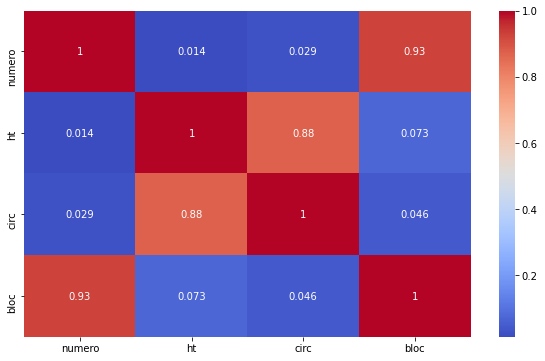

In [67]:
# Affiche la corrélation entre les données de la dataframe selon leurs colonnes
print("On affiche les corrélations entre les données de la dataframe selon leurs colonnes pour l'intuition")
plt.figure(figsize=(10, 6))
sns.heatmap(eucalyptus_stats_data.corr(), annot=True, cmap='coolwarm', fmt='.2g')

In [16]:
M = eucalyptus_stats_data.mean()
print(M)
mx = M[2]
print("La valeur moyenne de 'circ' la circonférence de l'eucalyptus est de : ", mx, " (en cm).")
my = M[1]
print("La valeur moyenne de 'ht' la hauteur de l'eucalyptus est de : ", my, " (en m).")

numero    883.216935
ht         21.212386
circ       47.347796
bloc        1.852344
dtype: float64
La valeur moyenne de 'circ' la circonférence de l'eucalyptus est de :  47.34779566130161  (en cm).
La valeur moyenne de 'ht' la hauteur de l'eucalyptus est de :  21.212386284114764  (en m).


In [68]:
# On convertit les vecteurs X et Y en array numpy afin de faciliter les manipulations des données issues de 'circ' et 'ht'
X = eucalyptus_stats_data['circ']
Y = eucalyptus_stats_data['ht']
X = X.to_numpy()
print(X)
Y = Y.to_numpy()
print(Y)

[36. 42. 33. ... 50. 37. 40.]
[18.25 19.75 16.5  ... 20.25 20.25 19.75]


In [36]:
# Calcul des estimateurs beta1 et beta2

b21 = 0
for i in range (1429):
    b21 = b21 + (X[i] - mx)*Y[i]
print(b21)
    
b22 = 0 
for i in range (1429):
    b22 = b22 + (X[i] - mx)*(X[i] - mx)
print(b22)

b2 = b21/b22
print("L'estimateur beta2 = ",b2)

b1 = my - b2*mx
print("L'estimateur beta1 = ",b1)

26465.694016794976
102924.14555633276
L'estimateur beta2 =  0.25713785500710995
L'estimateur beta1 =  9.037475668452721


In [41]:
# Définition et lancement du modèle de régression linéaire
# Affichage des résultats et paramètres
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())
b = result.params
print(b)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4732.
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        13:51:29   Log-Likelihood:                -2286.2
No. Observations:                1429   AIC:                             4576.
Df Residuals:                    1427   BIC:                             4587.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0375      0.180     50.264      0.0

# Explication des résultats

'Dep. Variable' correspond à la variable qui dépend d'autres variables, ici c'est donc Y.

'Model' correspond à la méthode employée, ici OLS signifie 'Ordinary Least Squares', c'est la dénomination anglaise de la méthode des moindres carrés.

'Number of observations' correspond à la taille de notre échantillon de données.

'Df Residuals' correspond à N-K avec N = la taille de l'échantillon de données et K = le nombre de variables définissant Y + 1.

'Df Model' correspond à K-1 avec K = le nombre de variables définissant Y + 1, autrement dit 'Df Model' correspond au nombre de variables définissant Y.

'const' correspond à la constante qui participe à définir le modèle (qui est définit par une fonction affine)

'circ' correspond au coefficient directeur de notre fonction affine, quand la circonférence augmente de 1 alors la prévision de la taille augmente de 0.2571 à 10^(-4) près.

'std err' correspond à la variance, elle diffère selon le paramètre.

'[0.025    0.975]' correspond à l'intervalle de confiance de 5%.

'R-squared' correspond au coefficient de détermination, ici il nous dit combien de pourcentage des variations de 'ht' peut être expliqué par 'circ', R² est à valeurs dans [0;1], plus R² est grand plus la régression est de bonne qualité. Ici R² = 0.768.

'F-Statistic' correspond à la justesse du 'fit' de la régression, plus c'est élevé mieux c'est donc.

In [64]:
#Calcul de Rsquared

X = eucalyptus_stats_data['circ']
X = X.to_numpy()
print(X)

print(Y)

r1 = 0
for i in range (1429):
    r1 = r1 + (Y[i] - (9.0375 + 0.2571*X[i]))*(Y[i] - (9.0375 + 0.2571*X[i]))
print(r1)

r2 = 0
for i in range (1429):
    r2 = r2 + (Y[i] - my)*(Y[i] - my)
print(r2)

Rsquared = 1 - r1/r2
print("Rsquared = ",Rsquared)

[36. 42. 33. ... 50. 37. 40.]
[18.25 19.75 16.5  ... 20.25 20.25 19.75]
2052.088586410003
8857.415762771161
Rsquared =  0.7683197174693785


# Valeur de R-squared et Rsquared

On voit qu'en appliquant la formule du cours on obtient Rsquared = 0.7683197174693785, à 10^(-4) près cela correspond au résultat R-squared obtenu par summary().

In [43]:
# Calcul de l'estimateur sans biais de la variance

res = np.zeros(1429)

for i in range(1429):
    res[i] = Y[i] - my - b2*(X[i] - mx)
print(res)

ressquare = np.zeros(1429)

for i in range(1429):
    ressquare[i] = pow(res[i],2)
print(ressquare)

varsb = 0
for i in range(1429):
    varsb = varsb + ressquare[i]/1427
print(varsb)

[-0.04443845 -0.08726558 -1.02302488 ... -1.64436842  1.6984237
  0.42701013]
[1.97477572e-03 7.61528123e-03 1.04657991e+00 ... 2.70394750e+00
 2.88464305e+00 1.82337652e-01]
1.438040625100234


In [44]:
# Calcul de la variance pour chaque estimateur b1 et b2

errx = 0
for i in range(1429):
    errx = errx + (X[i] - my)*(X[i] - my)
print(errx)

varb2 = varsb*(1/1429 + pow(my,2)/errx)
print(varb2)

varb1 = varsb/errx
print(varb1)

1079016.3472708182
0.0016060101576993156
1.3327329365653305e-06


# A propos de la variance

varb1 est différente de std erreur pour la constante, et varb2 est différente de std erreur pour la circonférence

In [45]:
# Calcul des intervalles de confiance

quantile = sp.stats.t.ppf(0.975,df=1427)

icb11 = b1 - quantile*varb1
icb12 = b1 + quantile*varb1
icb21 = b2 - quantile*varb2
icb22 = b2 + quantile*varb2

print("Intervalle de confiance de b1 : ", [icb11 , icb12], "Intervalle de confiance de b2 : ", [icb21 , icb22])

Intervalle de confiance de b1 :  [9.037473054126757, 9.037478282778686] Intervalle de confiance de b2 :  [0.2539874608507229, 0.260288249163497]


# A propos des intervalles de confiance

L'intervalle de confiance de b1 contient l'intervalle de confiance donné pour la constante par summary() qui par ailleurs est un point.
L'intervalle de confiance de b2 quant à lui qui est censé correspondre à l'intervalle de confiance pour la circonférence donné par summary est quant à lui contenu dans ce dernier intervalle. Cependant la longueur du premier intervalle est moins de 2 fois plus petite que la longueur du deuxième. Les résultats ne divergent pas tant que ça l'un de l'autre.

# La régression linéaire avec racinecirc

In [52]:
# On charge à nouveau les données dans une autre dataframe
eucalyptus = pd.read_csv("C:\\Users\\yanno\\OneDrive\\Documents\\Data Science 1\\eucalyptus.csv", sep=';')
print(eucalyptus)

      numero     ht  circ  bloc   clone
0          1  18.25    36     1  L2-123
1          2  19.75    42     1  L2-123
2          3  16.50    33     1  L2-123
3          4  18.25    39     1  L2-123
4          5  19.50    43     1  L2-123
...      ...    ...   ...   ...     ...
1424    1732  16.50    37     3     2-6
1425    1733  17.00    41     3     2-6
1426    1735  20.25    50     3     2-6
1427    1736  20.25    37     3     2-6
1428    1737  19.75    40     3     2-6

[1429 rows x 5 columns]


In [53]:
# Conversion des colonnes type int64 en type float64
cols_to_convert = eucalyptus_stats_data.columns[0:4]
eucalyptus[cols_to_convert] = eucalyptus[cols_to_convert].astype(float)
eucalyptus

,numero,ht,circ,bloc,clone
0,1.0,18.25,36.0,1.0,L2-123
1,2.0,19.75,42.0,1.0,L2-123
2,3.0,16.50,33.0,1.0,L2-123
3,4.0,18.25,39.0,1.0,L2-123
4,5.0,19.50,43.0,1.0,L2-123
...,...,...,...,...,...
1424,1732.0,16.50,37.0,3.0,2-6
1425,1733.0,17.00,41.0,3.0,2-6
1426,1735.0,20.25,50.0,3.0,2-6
1427,1736.0,20.25,37.0,3.0,2-6


In [55]:
# On enregistre les données de la colonne 'circ' dans une array numpy et on les y met en float64 afin de faciliter leur manipulation
X = eucalyptus['circ']
X = X.to_numpy()
X = X.astype(float)
print(X)

[36. 42. 33. ... 50. 37. 40.]


In [56]:
# Chaque élément de l'array devient sa propre racine
for i in range(1429):
    X[i] = pow(X[i],1/2)
print(X)

[6.         6.4807407  5.74456265 ... 7.07106781 6.08276253 6.32455532]


In [57]:
# On rajoute une colonne à notre dataframe selon notre array X
eucalyptus['racinecirc'] = X

In [65]:
# On supprime la colonne 'circ' de notre dataframe car elle ne nous intéresse plus
eucalyptus.drop(columns='circ')

,numero,ht,bloc,clone,racinecirc
0,1.0,18.25,1.0,L2-123,6.000000
1,2.0,19.75,1.0,L2-123,6.480741
2,3.0,16.50,1.0,L2-123,5.744563
3,4.0,18.25,1.0,L2-123,6.244998
4,5.0,19.50,1.0,L2-123,6.557439
...,...,...,...,...,...
1424,1732.0,16.50,3.0,2-6,6.082763
1425,1733.0,17.00,3.0,2-6,6.403124
1426,1735.0,20.25,3.0,2-6,7.071068
1427,1736.0,20.25,3.0,2-6,6.082763


In [59]:
# Cela nous aidera par la suite à calculer les estimateurs beta1 et beta2
M = eucalyptus.mean()
print(M)
mx = M[4]
print("La valeur moyenne de 'racinecirc' la racine de la circonférence de l'eucalyptus est de : ", mx, " (en cm).")
my = M[1]
print("La valeur moyenne de 'ht' la hauteur de l'eucalyptus est de : ", my, " (en m).")

numero        883.216935
ht             21.212386
circ           47.347796
bloc            1.852344
racinecirc      6.852064
dtype: float64
La valeur moyenne de 'racinecirc' la racine de la circonférence de l'eucalyptus est de :  6.852063653822951  (en cm).
La valeur moyenne de 'ht' la hauteur de l'eucalyptus est de :  21.212386284114764  (en m).


In [60]:
# On convertit les colonnes 'racinecirc' et 'ht' de notre dataframe en arrays afin d'en faciliter la manipulation des données contenues
X = eucalyptus['racinecirc']
Y = eucalyptus['ht']
X = X.to_numpy()
print(X)
Y = Y.to_numpy()
print(Y)

[6.         6.4807407  5.74456265 ... 7.07106781 6.08276253 6.32455532]
[18.25 19.75 16.5  ... 20.25 20.25 19.75]


In [61]:
# Calcul des estimateurs beta1 et beta2

b21 = 0
for i in range (1429):
    b21 = b21 + (X[i] - mx)*Y[i]
print(b21)
    
b22 = 0 
for i in range (1429):
    b22 = b22 + (X[i] - mx)*(X[i] - mx)
print(b22)

b2 = b21/b22
print("L'estimateur beta2 = ",b2)

b1 = my - b2*mx
print("L'estimateur beta1 = ",b1)

1982.4240069644932
567.3406443764012
L'estimateur beta2 =  3.4942393544596064
L'estimateur beta1 =  -2.7303641943356745


In [62]:
# Définition et lancement du modèle de régression linéaire
# Affichage des résultats et paramètres
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())
b = result.params
print(b)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     5121.
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        14:09:20   Log-Likelihood:                -2242.5
No. Observations:                1429   AIC:                             4489.
Df Residuals:                    1427   BIC:                             4500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7304      0.336     -8.126      0.0

In [66]:
# Calcul de Rsquared
X = eucalyptus['racinecirc']
X = X.to_numpy()
print(X)

print(Y)

r1 = 0
for i in range (1429):
    r1 = r1 + (Y[i] - (-2.7304 + 3.4942*X[i]))*(Y[i] - (-2.7304 + 3.4942*X[i]))
print(r1)

r2 = 0
for i in range (1429):
    r2 = r2 + (Y[i] - my)*(Y[i] - my)
print(r2)

Rsquared = 1 - r1/r2
print("Rsquared = ",Rsquared)

[6.         6.4807407  5.74456265 ... 7.07106781 6.08276253 6.32455532]
[18.25 19.75 16.5  ... 20.25 20.25 19.75]
1930.3519146301414
8857.415762771161
Rsquared =  0.7820637569319423


# A propos de la régression linéaire la plus approprié

Si on en croît la valeur Rsquared obtenue par calcul et non celle donnée par summary(), alors pour cette deuxième régression linéaire on a Rsquared = 0.7820637569319423 de valeur supérieure à la valeur Rsquared = 0.7683197174693785 qu'on avait pour la première régression linéaire.

Et donc on en déduit directement que la deuxième régression linéaire (celle avec 'racinecirc') est plus adaptée au nuage de points que la première, autrement dit la deuxième régression linéaire est meilleure.

En effet comme 0.7820637569319423 > 0.7683197174693785 , et que Rsquared indique dans quelles proportions la variable explicative explique la variable estimée par le modèle, il est évident que la régression linéaire dont la variable explicative est 'racinecirc' est plus appropriée.